# Multi-Agent Model Training

---

In this notebook, I will train a Reinforcement Learning Agent to operate 2 tennis players to keep up a moving ball. In this environment, the simultaneous simulation of 2 tennis players will be used to train the agent.

### Import necessary packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agent import Agent
import matplotlib.pyplot as plt

### Start the multi-agent environment

In [2]:
env = UnityEnvironment(file_name="./Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### Train the DDPG Agent

Now I train the agent to solve the environment using the Deep Deterministic Policy Gradients (DDPG) algorithm in a multi-agent environment.

In [5]:
# initialize agent
agent = Agent(state_size=state_size, 
              action_size=action_size)

# train and get scores
scores, avg_scores = agent.train(env, n_episodes=2000)

Episode 50	Average Score: 0.00
Episode 100	Average Score: 0.00
Episode 150	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 250	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 350	Average Score: 0.01
Episode 400	Average Score: 0.02
Episode 450	Average Score: 0.03
Episode 500	Average Score: 0.02
Episode 550	Average Score: 0.02
Episode 600	Average Score: 0.01
Episode 650	Average Score: 0.00
Episode 700	Average Score: 0.02
Episode 750	Average Score: 0.05
Episode 800	Average Score: 0.08
Episode 850	Average Score: 0.10
Episode 900	Average Score: 0.10
Episode 950	Average Score: 0.10
Episode 1000	Average Score: 0.13
Episode 1050	Average Score: 0.12
Episode 1100	Average Score: 0.09
Episode 1150	Average Score: 0.12
Episode 1200	Average Score: 0.12
Episode 1250	Average Score: 0.10
Episode 1300	Average Score: 0.34
Episode 1314	Score: 2.50	Max Score: 0.50
Environment solved in 1214 episodes!	Average Score: 0.50


In [6]:
env.close()

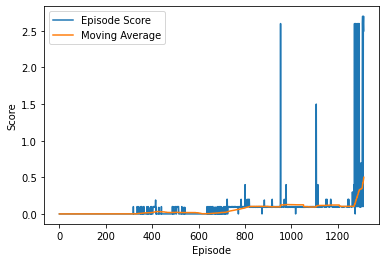

In [7]:
# plot the scores
plt.plot(np.arange(len(scores)), scores, label='Episode Score')
plt.plot(np.arange(len(scores)), avg_scores, label='Moving Average')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.legend(loc='upper left');
plt.show()